**ALBERTO FONTALVO**

Información del conjunto de datos
información adicional

La base de datos de evaluación de automóviles se derivó de un modelo de decisión jerárquico simple desarrollado originalmente para la demostración de DEX, M. Bohanec, V. Rajkovic: Sistema experto para la toma de decisiones. Sistémica 1(1), págs. 145-157, 1990.). El modelo evalúa los coches según la siguiente estructura conceptual:

DOI
10.24432/C5JP48

Aceptabilidad del coche:

 **PRECIO precio total**

. . precio de compra

. . precio de mantenimiento del mantenimiento

**Características técnicas TECNOLOGÍA**

. . CONFORT comodidad

. . . puertas numero de puertas

. . . capacidad de las personas en términos de personas para transportar

. . . lug_boot el tamaño del maletero del equipaje

. . seguridad seguridad estimada del coche


Los atributos de entrada se imprimen en minúsculas. Además del concepto objetivo (CAR), el modelo incluye tres conceptos intermedios: PRECIO, TECNOLOGÍA y CONFORT. Cada concepto está en el modelo original relacionado con sus descendientes de nivel inferior mediante un conjunto de ejemplos (para estos conjuntos de ejemplos, consulte http://www-ai.ijs.si/BlazZupan/car.html).

La base de datos de evaluación de automóviles contiene ejemplos con la información estructural eliminada, es decir, relaciona directamente CAR con los seis atributos de entrada: compra, mantenimiento, puertas, personas, lug_boot, seguridad.

Debido a la estructura conceptual subyacente conocida, esta base de datos puede ser particularmente útil para probar métodos de inducción constructiva y descubrimiento de estructuras.

# **Librerías**

In [1]:
pip install joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns # librería para gráficos estadisticos mas especializados
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split #División del dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score #Métricas
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from pandas.core.dtypes.api import is_numeric_dtype, is_string_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
import joblib
from yellowbrick.classifier import ClassificationReport


# **Adquicisión del dataset**

Instalación de paquete ucimlrepo

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

# **Análisis exploratorio de datos**

Tipos de datos de las variables predictoras

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


**Análisis de tipo de datos de variables predictoras:** 1728 filas, todas las variables son categóricas.

In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


**Análisis de tipo de datos de etiqueta:** 1728 filas, una variable dependiente categórica.

In [7]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [8]:
y.tail(40)

,class
1688,vgood
1689,unacc
1690,good
1691,vgood
1692,unacc
1693,acc
1694,good
1695,unacc
1696,good
1697,vgood


In [9]:
# Obtener las clases únicas
unique_classes = np.unique(y)

# Imprimir las clases únicas
print("Clases únicas en 'y':", unique_classes)

Clases únicas en 'y': ['acc' 'good' 'unacc' 'vgood']


Validación de datos vacios

In [10]:
X=X.dropna(how="any", axis=0)
X.shape

(1728, 6)

Validación de datos repetidos

In [11]:
duplicados=X[X.duplicated()]
duplicados

,buying,maint,doors,persons,lug_boot,safety


El dataset no presenta datos vacios ni duplicados.

Análsisi univariable

In [12]:
X_df = pd.DataFrame(X, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
y_df = pd.DataFrame(y, columns=['class'])

dataset = pd.concat([X_df, y_df], axis=1)

In [13]:
dataset.tail(5)

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


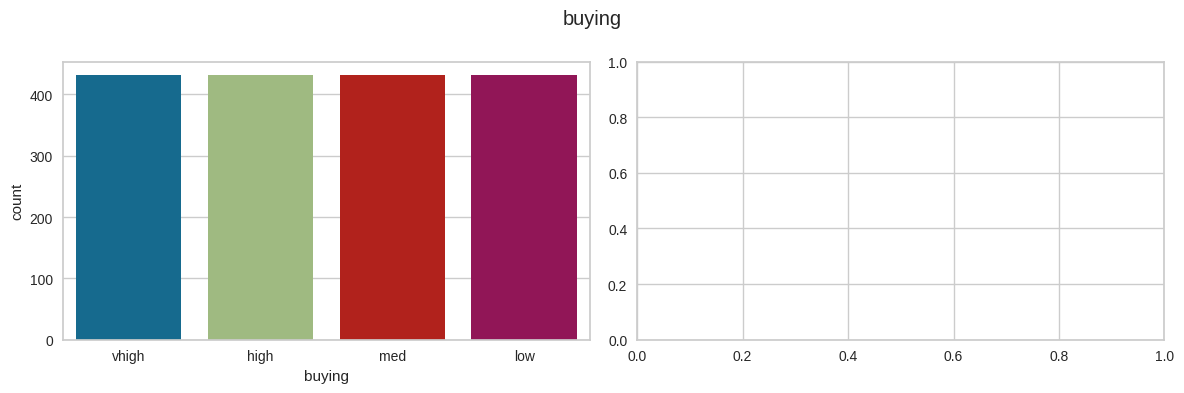

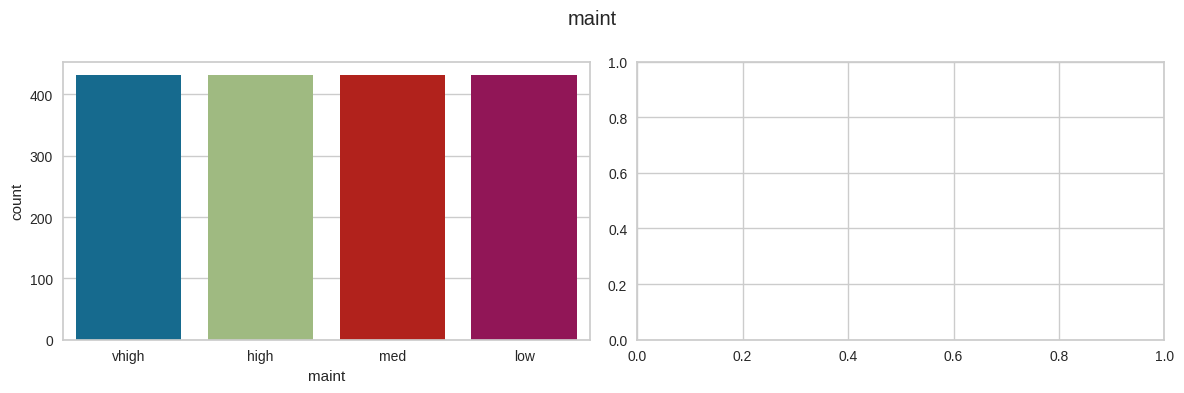

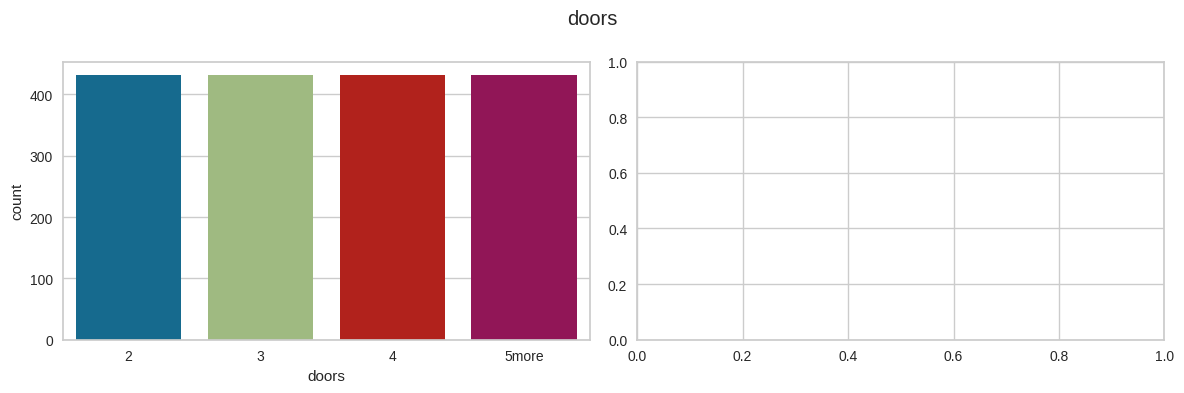

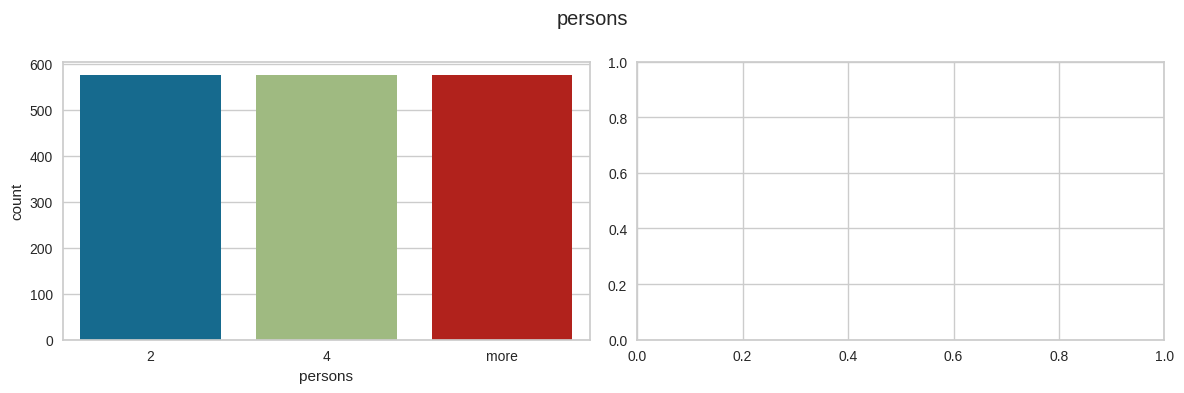

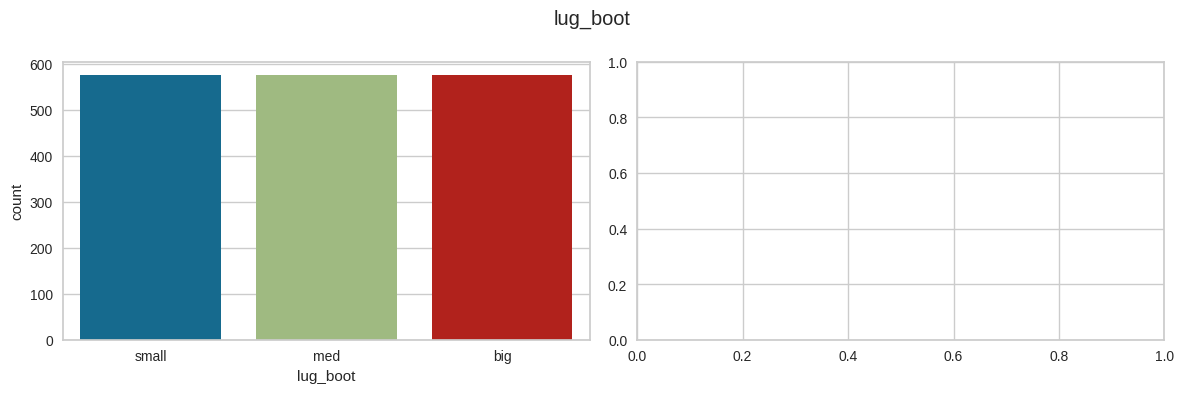

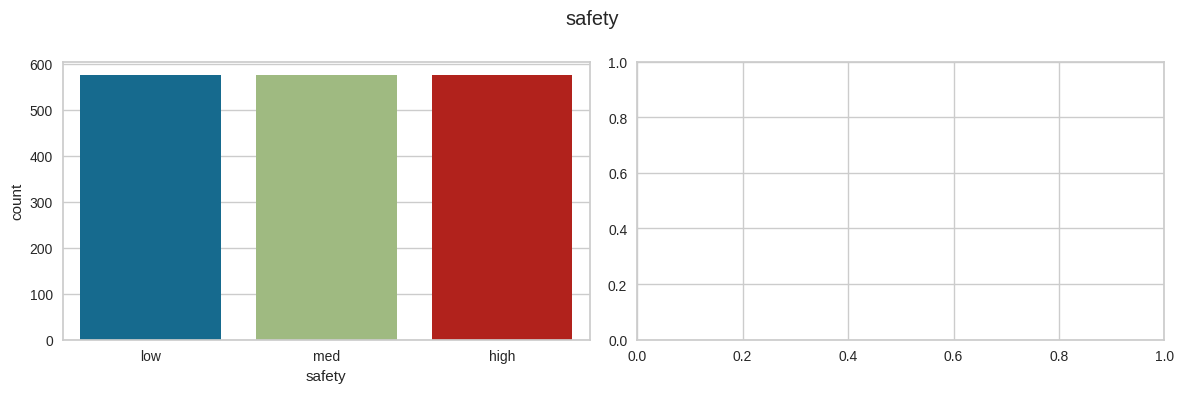

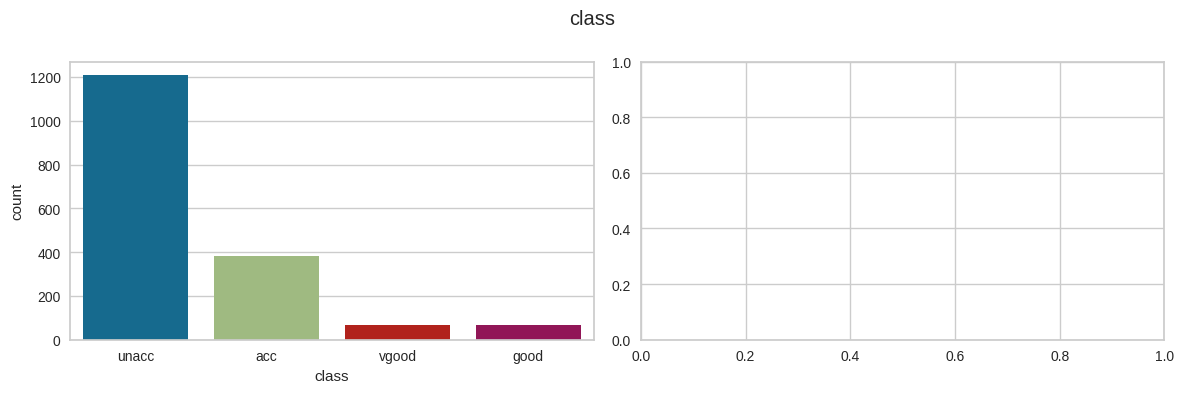

In [14]:
num_list=[]     #Enteras
cat_list=[]     #Categoricas

for column in dataset:     #Desde el primer elemento hasta el ultimo del dataset
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
  fig.suptitle(column)      #Columnas del dataset con titulo
  if is_numeric_dtype(dataset[column]):      #Análiso por tipo de dato
    sns.histplot(dataset[column], kde=True, ax=ax1)
    sns.boxplot(x=dataset[column], ax=ax2)
    num_list.append(column)
  elif is_string_dtype(dataset[column]):
    sns.countplot(data=dataset, x=dataset[column], ax=ax1)
    cat_list.append(column)
  plt.tight_layout()

Valores por categória

In [15]:
for i in dataset.columns:
    print(dataset[i].value_counts())
    print()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



Relación variables preditoras con las clases

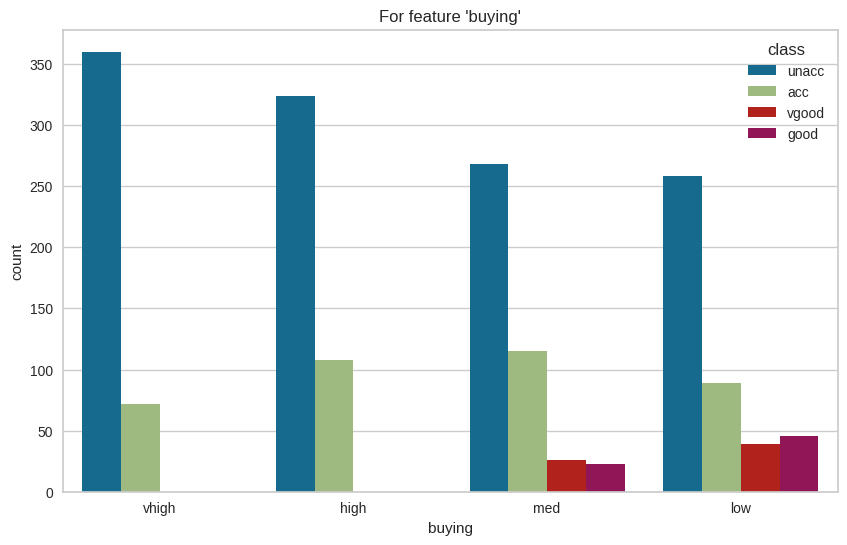

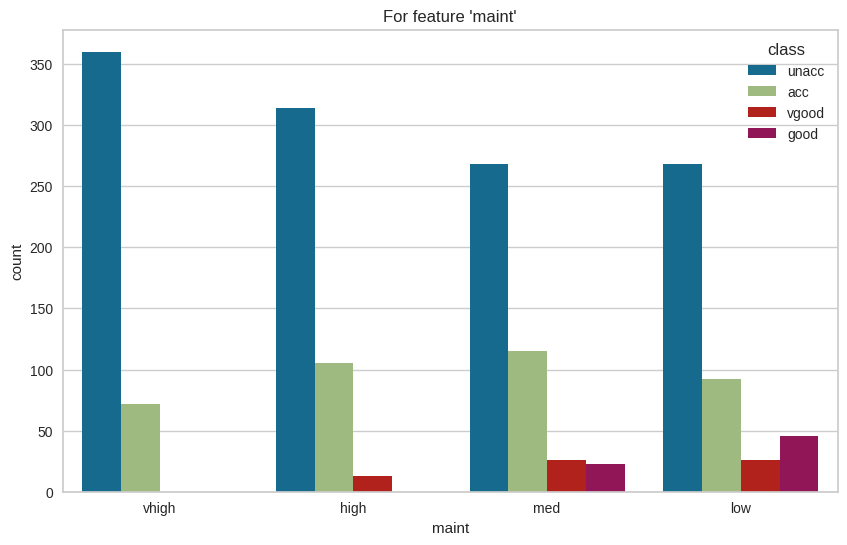

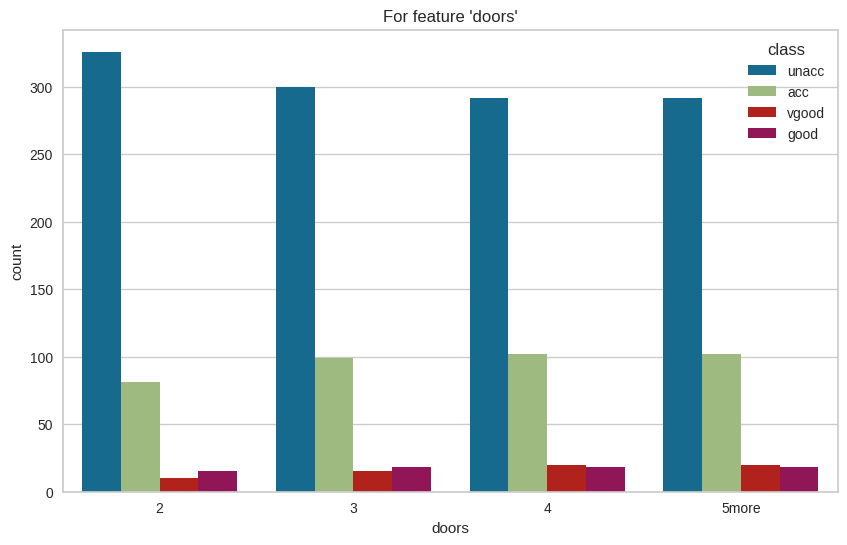

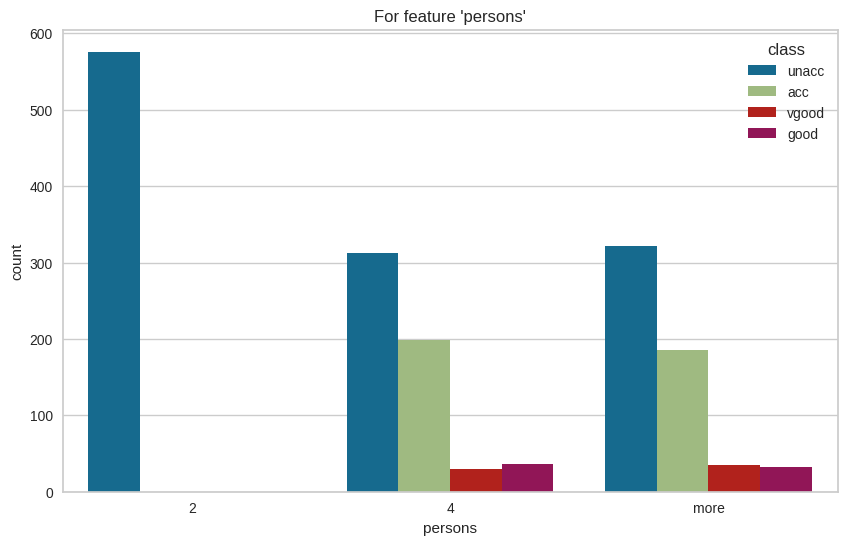

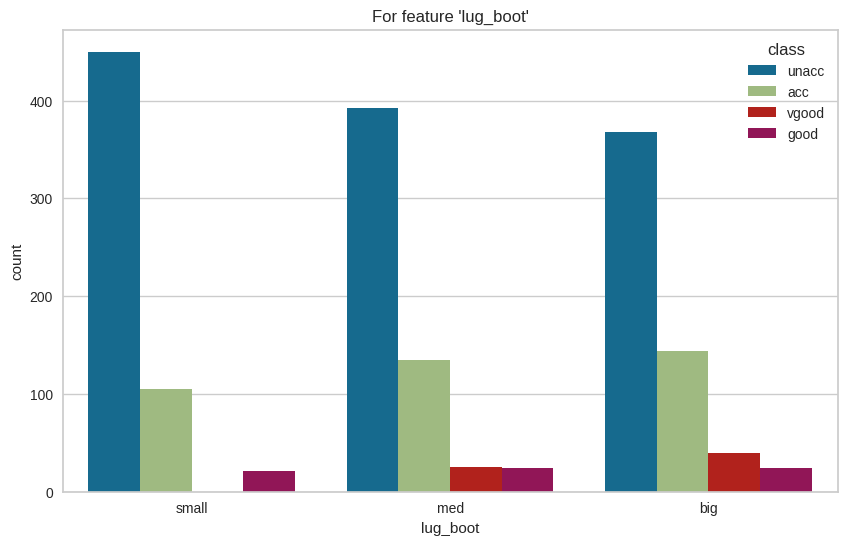

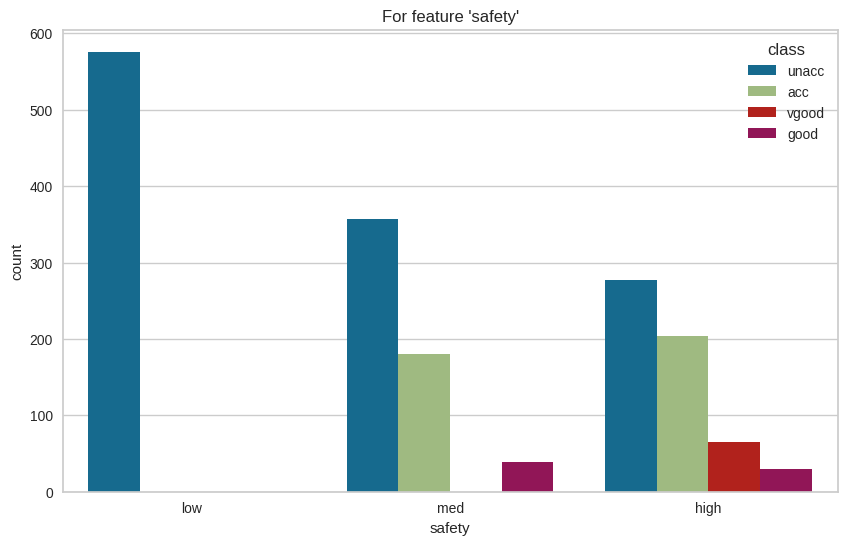

In [16]:
for i in dataset.columns[:-1]:
    plt.figure(figsize=(10,6))
    plt.title("For feature '%s'" % i)
    sns.countplot(data=dataset, x=i, hue='class')

**Convertir variables categóricas a númericas**



In [17]:
#Borrar del dataset las clases dependientes
dataset = dataset.drop(columns=['class'])


In [18]:
#Convertir las variables predictoras en númericas
dataset = pd.get_dummies(dataset)

In [19]:
variables=dataset
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   buying_high     1728 non-null   uint8
 1   buying_low      1728 non-null   uint8
 2   buying_med      1728 non-null   uint8
 3   buying_vhigh    1728 non-null   uint8
 4   maint_high      1728 non-null   uint8
 5   maint_low       1728 non-null   uint8
 6   maint_med       1728 non-null   uint8
 7   maint_vhigh     1728 non-null   uint8
 8   doors_2         1728 non-null   uint8
 9   doors_3         1728 non-null   uint8
 10  doors_4         1728 non-null   uint8
 11  doors_5more     1728 non-null   uint8
 12  persons_2       1728 non-null   uint8
 13  persons_4       1728 non-null   uint8
 14  persons_more    1728 non-null   uint8
 15  lug_boot_big    1728 non-null   uint8
 16  lug_boot_med    1728 non-null   uint8
 17  lug_boot_small  1728 non-null   uint8
 18  safety_high     1728 non-nul

# **División del dataset**

In [20]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(variables, y, test_size=0.3, random_state=42)

#División del dataset temporal (30%) en prueba (20%) y validación (10%)
X_test, X_validation, y_test, y_validation = train_test_split(X_test_temp, y_test_temp, test_size=0.33, random_state=42)

# **Modelo SVM**

**SVM con ajustes de hiperparámetros kernel y regularización (c)**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

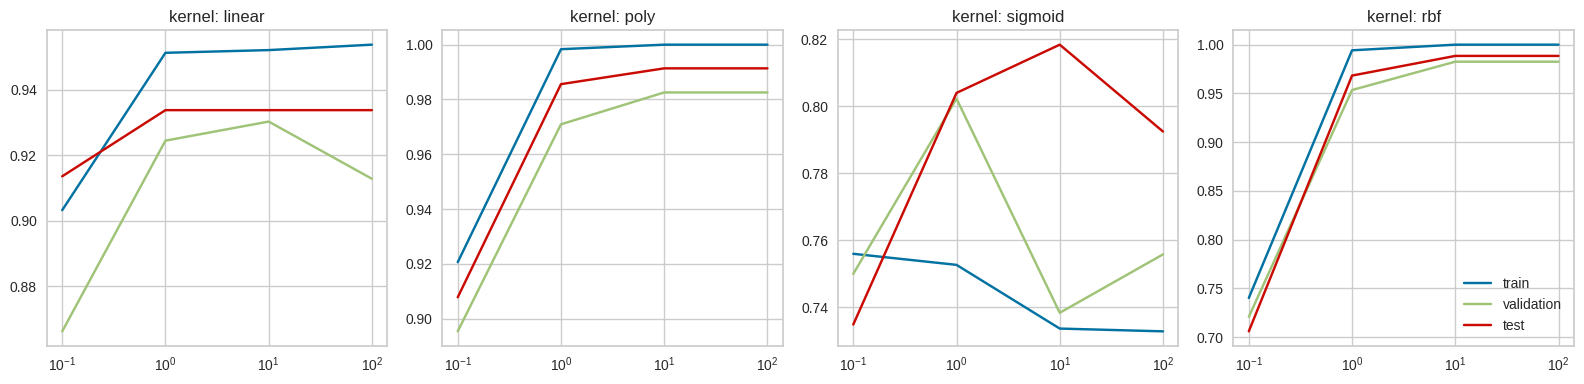

In [21]:
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'sigmoid', 'rbf']

fig, axes = plt.subplots(ncols=len(kernels), figsize=(16, 4))

for i, kernel in enumerate(kernels):
    training_accuracy = []
    validation_accuracy = []
    testing_accuracy = []

    for C_value in C_values:
        classifier = svm.SVC(kernel=kernel, C=C_value)
        classifier.fit(X_train_temp, y_train_temp)
        training_accuracy.append(classifier.score(X_train_temp, y_train_temp))
        validation_accuracy.append(classifier.score(X_validation, y_validation))
        testing_accuracy.append(classifier.score(X_test, y_test))

    plt.subplot(1, len(kernels), i + 1)
    plt.plot(C_values, training_accuracy, label='train')
    plt.plot(C_values, validation_accuracy, label='validation')
    plt.plot(C_values, testing_accuracy, label='test')
    plt.title(f'kernel: {kernel}')
    plt.xscale('log')

plt.tight_layout()
plt.legend()
plt.show()

**Selección de hiperparámetros: kernel='poly' - c=10**

In [22]:
#Clasificador SVC con C=10 y kernel='poly'
best_classifier = SVC(kernel='poly', C=10)

best_classifier.fit(X_train_temp, y_train_temp)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, kernel='poly')

In [23]:
joblib.dump(best_classifier, 'modelo_svm_kernel_poly_c_10.joblib')

modelo_cargado = joblib.load('modelo_svm_kernel_poly_c_10.joblib')

In [24]:
y_pred_train = best_classifier.predict(X_train_temp)
accuracy_train = accuracy_score(y_train_temp, y_pred_train)
print("Precisión de entrenamiento:", accuracy_train)

y_pred_test = best_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión de prueba:", accuracy_test)

y_pred_validation = best_classifier.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
print("Precisión de validación:", accuracy_validation)

Precisión de entrenamiento: 1.0
Precisión de prueba: 0.9913544668587896
Precisión de validación: 0.9825581395348837


**Interpretación de precisión:**

Modelo con kernel polinómico y y parámetro de regularización C=10.

El modelo realiza un trabajo muy exacto y efectivo en los datos de entrenamiento, prueba y validación.  

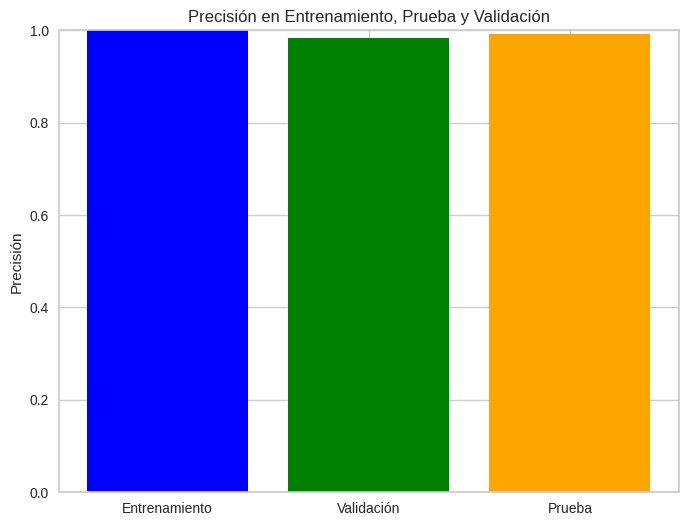

In [25]:
precisiones = [accuracy_train, accuracy_validation, accuracy_test]
conjuntos = ["Entrenamiento", "Validación", "Prueba"]

plt.figure(figsize=(8, 6))
plt.bar(conjuntos, precisiones, color=['blue', 'green', 'orange'])
plt.title("Precisión en Entrenamiento, Prueba y Validación")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.show()

In [26]:
precision_train = precision_score(y_train_temp, y_pred_train, average='weighted')
recall_train = recall_score(y_train_temp, y_pred_train, average='weighted')
f1_train = f1_score(y_train_temp, y_pred_train, average='weighted')

conf_matrix_train = confusion_matrix(y_train_temp, y_pred_train)

print("Resultados e entrenamiento:")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-score: {f1_train}")
print("Matriz de Confusión:")
print(conf_matrix_train)

precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("\nResultados de prueba:")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-score: {f1_test}")
print("Matriz de Confusión:")
print(conf_matrix_test)

precision_validation = precision_score(y_validation, y_pred_validation, average='weighted')
recall_validation = recall_score(y_validation, y_pred_validation, average='weighted')
f1_validation = f1_score(y_validation, y_pred_validation, average='weighted')

conf_matrix_validation = confusion_matrix(y_validation, y_pred_validation)

print("\nResultados de validación:")
print(f"Precision: {precision_validation}")
print(f"Recall: {recall_validation}")
print(f"F1-score: {f1_validation}")
print("Matriz de Confusión:")
print(conf_matrix_validation)

Resultados e entrenamiento:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Matriz de Confusión:
[[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]

Resultados de prueba:
Precision: 0.9919948767211015
Recall: 0.9913544668587896
F1-score: 0.9912620012636963
Matriz de Confusión:
[[ 81   0   0   1]
 [  1  10   0   1]
 [  0   0 237   0]
 [  0   0   0  16]]

Resultados de validación:
Precision: 0.9849760059062385
Recall: 0.9825581395348837
F1-score: 0.9829682552680423
Matriz de Confusión:
[[ 34   2   0   0]
 [  0   7   0   0]
 [  0   0 121   0]
 [  1   0   0   7]]


**Interpretación**

**Entrenamiento:**

Precision: 1.0 - Todos los casos predichos como positivos fueron realmente positivos. No hubo falsos positivos.

Recall: 1.0 - Se capturaron todos los casos positivos, no hubo falsos negativos.

F1-score: 1.0 - El equilibrio entre precisión y recall es perfecto, indicando un rendimiento excelente.

**Prueba:**

Precision: 0.992 - El 99.2% de los casos predichos como positivos fueron realmente positivos.

Recall: 0.991 - Se capturó el 99.1% de los casos positivos.

F1-score: 0.991 - Un buen equilibrio entre precisión y recall.

**Validación:**

Precision: 0.985 - El 98.5% de los casos predichos como positivos fueron realmente positivos.

Recall: 0.983 - Se capturó el 98.3% de los casos positivos.

F1-score: 0.983 - Un buen equilibrio entre precisión y recall.

En entrenamiento, prueba y validación. La precisión, el recall y el F1-score son altos y la matriz de confusión muestra que el modelo está haciendo predicciones precisas en todas las clases.

La diferencia entre las métricas de validación y prueba es menor al 1%, que se puede despreciar el ligero sobre ajuste.


**Reporte de clasificación**

In [27]:
classification_report_train = classification_report(y_train_temp, y_pred_train)
print("Informe de clasificación entrenamiento:\n", classification_report_train)

classification_report_test = classification_report(y_test, y_pred_test)
print("Informe de clasificación prueba:\n", classification_report_test)

classification_report_validation = classification_report(y_validation, y_pred_validation)
print("Informe de clasificación validación:\n", classification_report_validation)

Informe de clasificación entrenamiento:
               precision    recall  f1-score   support

         acc       1.00      1.00      1.00       266
        good       1.00      1.00      1.00        50
       unacc       1.00      1.00      1.00       852
       vgood       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Informe de clasificación prueba:
               precision    recall  f1-score   support

         acc       0.99      0.99      0.99        82
        good       1.00      0.83      0.91        12
       unacc       1.00      1.00      1.00       237
       vgood       0.89      1.00      0.94        16

    accuracy                           0.99       347
   macro avg       0.97      0.96      0.96       347
weighted avg       0.99      0.99      0.99       347

Informe de clasificación validación:
               pre

**Interpretación:**

**Entrenamiento:**

**Accuracy:** El modelo alcanza una precisión del 100%, indicativo de un buen rendimiento.

**Precision, Recall, F1-score:** Todas las métricas para cada clase son del 100%, muestra que el modelo está haciendo predicciones perfectas en el conjunto de entrenamiento.

**Macro avg y weighted avg:** También son del 100%, indica que el modelo se desempeña consistentemente bien en todas las clases.

**Prueba:**

Accuracy: La precisión del modelo de prueba es alta (99%), lo cual es significativamente exacto.

**Precision, Recall, F1-score:** Las métricas son altas para la mayoría de las clases, en la clase 'good' presenta un recall levemente inferior 83%. Lo anterior sgiere que el modelo esta perdiendo algunos casos positivos.

**Macro avg y weighted avg:** Presenta un buen rendimiento general en el conjunto de prueba.

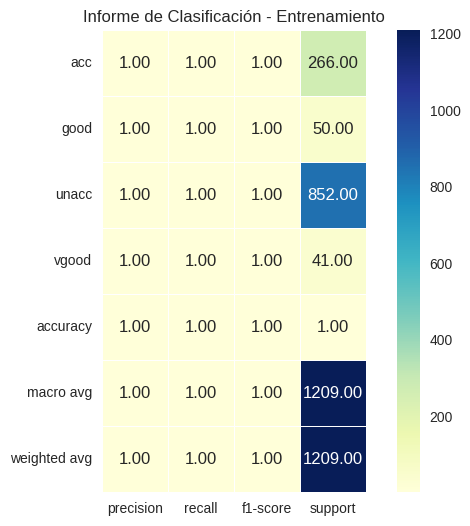

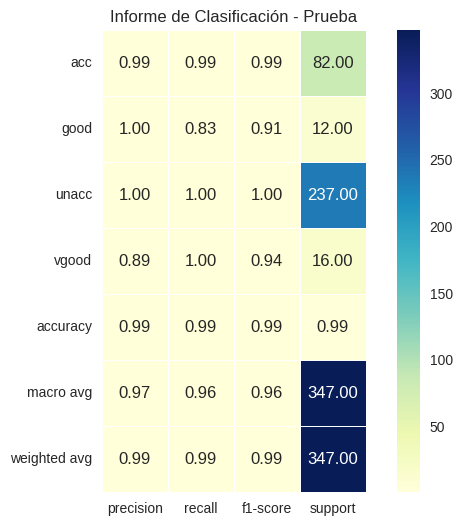

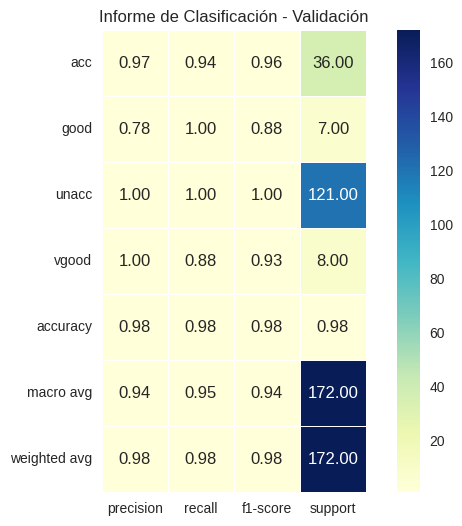

In [28]:
# Visualización del informe de clasificación para entrenamiento
classification_report_train = classification_report(y_train_temp, y_pred_train, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report_train).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Entrenamiento")
plt.show()

classification_report_test = classification_report(y_test, y_pred_test, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report_test).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Prueba")
plt.show()

# Visualización del informe de clasificación para validación
classification_report_validation = classification_report(y_validation, y_pred_validation, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report_validation).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Validación")
plt.show()

**ROC-AUC**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


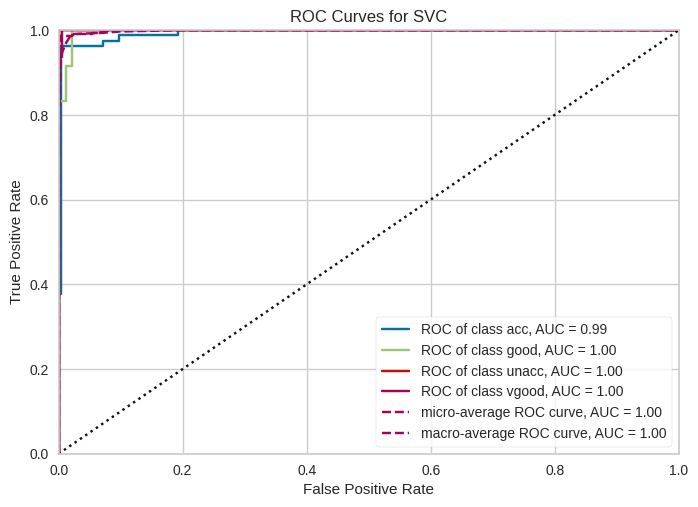

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [29]:
from yellowbrick.classifier import ROCAUC
# Calcular y mostrar el AUC-ROC
visualizer = ROCAUC(best_classifier, classes=best_classifier.classes_)
visualizer.fit(X_train_temp, y_train_temp)
visualizer.score(X_test, y_test)
visualizer.show()


**Interpretación**

El modelo clasificador muestra un rendimiento excepcional en todas las clases y deferencia con un alto rendimiento las clases positivas y negativas. La curva ROC extremadamente cercana al vortice inicial izquierdo y con valor cerno a 1 es indicador de la alta sensibilidad y una tasa significativamente baja de falsos positovs.

**Selección de hiperparámetros: kernel='rbf' - c=10**

In [30]:
best_classifier_rbf = SVC(kernel='rbf', C=10)
best_classifier_rbf.fit(X_train_temp, y_train_temp)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10)

In [31]:
# Guardar .joblib
joblib.dump(best_classifier_rbf, 'modelo_svm_rbf.joblib')
modelo_cargado_rbf = joblib.load('modelo_svm_rbf.joblib')

In [32]:
y_pred_train = best_classifier_rbf.predict(X_train_temp)
accuracy_train = accuracy_score(y_train_temp, y_pred_train)
print("Precisión de entrenamiento:", accuracy_train)

y_pred_test = best_classifier_rbf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Precisión de prueba:", accuracy_test)

y_pred_validation = best_classifier_rbf.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
print("Precisión de validación:", accuracy_validation)

Precisión de entrenamiento: 1.0
Precisión de prueba: 0.9884726224783862
Precisión de validación: 0.9825581395348837


**Interpretación:**

El modelo en entrenamiento, prueba y validación presenta un nivel de exactitud significativamente alto.

En general, el modelo con kernel 'rbf' y c=10, presenta un rendimiento muy aproximado al del kernel 'poly' con C=10.



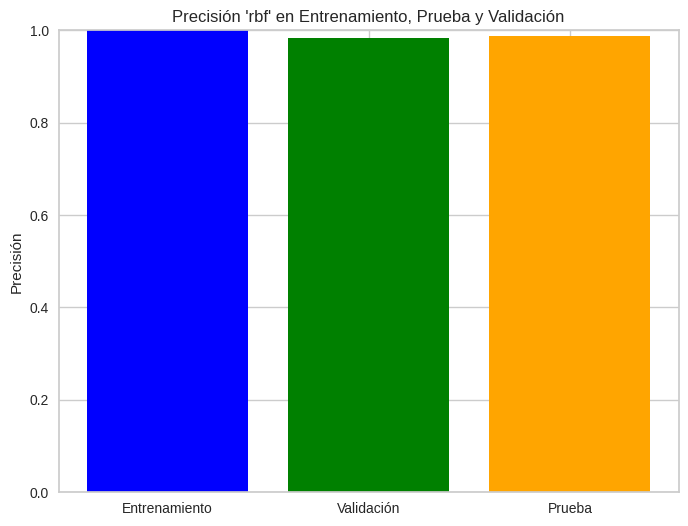

In [33]:
precisiones = [accuracy_train, accuracy_validation, accuracy_test]
conjuntos = ["Entrenamiento", "Validación", "Prueba"]

plt.figure(figsize=(8, 6))
plt.bar(conjuntos, precisiones, color=['blue', 'green', 'orange'])
plt.title("Precisión 'rbf' en Entrenamiento, Prueba y Validación")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.show()

In [34]:
precision_train_rbf = precision_score(y_train_temp, y_pred_train, average='weighted')
recall_train_rbf = recall_score(y_train_temp, y_pred_train, average='weighted')
f1_train_rbf = f1_score(y_train_temp, y_pred_train, average='weighted')

conf_matrix_train_rbf = confusion_matrix(y_train_temp, y_pred_train)

print("Resultados de entrenamiento:")
print(f"Precision: {precision_train_rbf}")
print(f"Recall: {recall_train_rbf}")
print(f"F1-score: {f1_train_rbf}")
print("Matriz de Confusión:")
print(conf_matrix_train_rbf)

precision_test_rbf = precision_score(y_test, y_pred_test, average='weighted')
recall_test_rbf = recall_score(y_test, y_pred_test, average='weighted')
f1_test_rbf = f1_score(y_test, y_pred_test, average='weighted')

conf_matrix_test_rbf = confusion_matrix(y_test, y_pred_test)

print("\nResultados de prueba:")
print(f"Precision: {precision_test_rbf}")
print(f"Recall: {recall_test_rbf}")
print(f"F1-score: {f1_test_rbf}")
print("Matriz de Confusión:")
print(conf_matrix_test_rbf)

precision_validation_rbf = precision_score(y_validation, y_pred_validation, average='weighted')
recall_validation_rbf = recall_score(y_validation, y_pred_validation, average='weighted')
f1_validation_rbf = f1_score(y_validation, y_pred_validation, average='weighted')

conf_matrix_validation_rbf = confusion_matrix(y_validation, y_pred_validation)

print("\nResultados de validación:")
print(f"Precision: {precision_validation_rbf}")
print(f"Recall: {recall_validation_rbf}")
print(f"F1-score: {f1_validation_rbf}")
print("Matriz de Confusión:")
print(conf_matrix_validation_rbf)

Resultados de entrenamiento:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Matriz de Confusión:
[[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]

Resultados de prueba:
Precision: 0.98881546816225
Recall: 0.9884726224783862
F1-score: 0.9884276763231115
Matriz de Confusión:
[[ 80   1   0   1]
 [  1  10   0   1]
 [  0   0 237   0]
 [  0   0   0  16]]

Resultados de validación:
Precision: 0.9849760059062385
Recall: 0.9825581395348837
F1-score: 0.9829682552680423
Matriz de Confusión:
[[ 34   2   0   0]
 [  0   7   0   0]
 [  0   0 121   0]
 [  1   0   0   7]]


**Interpretación:**

En entrenamiento, prueba y validación. La precisión, el recall y el F1-score son altos y la matriz de confusión muestra que el modelo está haciendo predicciones precisas en todas las clases.

Selección de modelo: Ambos modelos tienen un muy buen comportamiento en prueba y validación, presentan un leve sobre ajuste. El mejor es con kernel='poly' y c=10.

In [35]:
classification_report_train_rbf = classification_report(y_train_temp, y_pred_train)
print("Informe de clasificación para entrenamiento:")
print(classification_report_train_rbf)

classification_report_test_rbf = classification_report(y_test, y_pred_test)
print("\nInforme de clasificación para prueba:")
print(classification_report_test_rbf)

classification_report_validation_rbf = classification_report(y_validation, y_pred_validation)
print("\nInforme de clasificación para validación:")
print(classification_report_validation_rbf)

Informe de clasificación para entrenamiento:
              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       266
        good       1.00      1.00      1.00        50
       unacc       1.00      1.00      1.00       852
       vgood       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209


Informe de clasificación para prueba:
              precision    recall  f1-score   support

         acc       0.99      0.98      0.98        82
        good       0.91      0.83      0.87        12
       unacc       1.00      1.00      1.00       237
       vgood       0.89      1.00      0.94        16

    accuracy                           0.99       347
   macro avg       0.95      0.95      0.95       347
weighted avg       0.99      0.99      0.99       347


Informe de clasificación para validación:
   

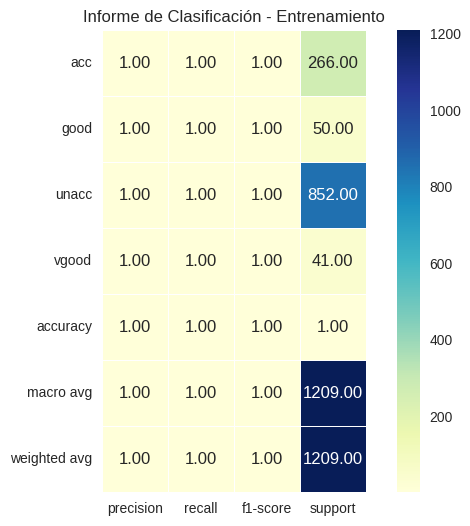

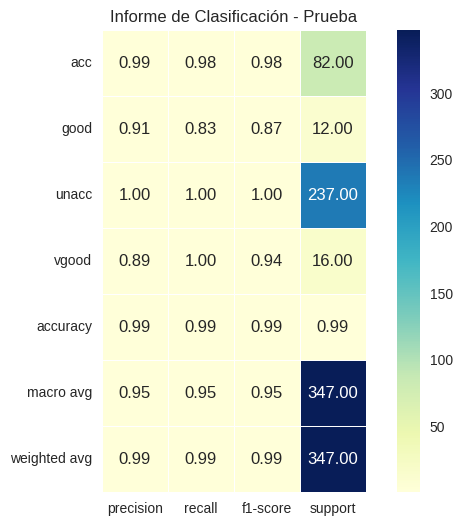

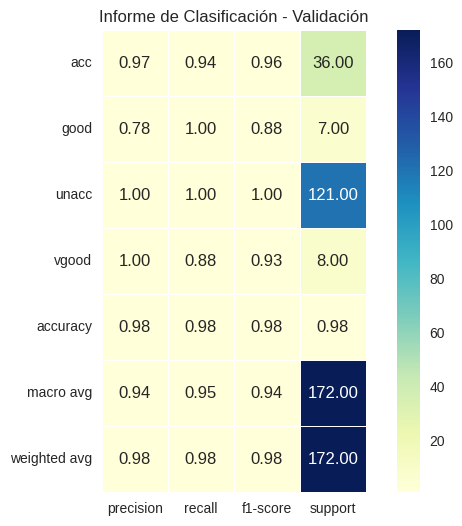

In [36]:
classification_report_train_rbf = classification_report(y_train_temp, y_pred_train, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report_train_rbf).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Entrenamiento")
plt.show()

classification_report_test_rbf = classification_report(y_test, y_pred_test, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report_test_rbf).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Prueba")
plt.show()

classification_report_validation_rbf = classification_report(y_validation, y_pred_validation, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report_validation_rbf).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Validación")
plt.show()

**ROC-AUC**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


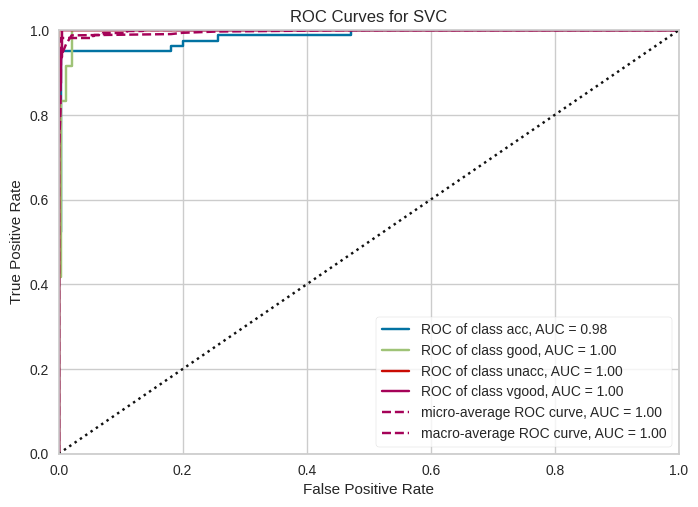

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
# Calcular y mostrar el AUC-ROC
visualizer = ROCAUC(best_classifier_rbf, classes=best_classifier_rbf.classes_)
visualizer.fit(X_train_temp, y_train_temp)
visualizer.score(X_test, y_test)
visualizer.show()

# **Modelo KNN**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

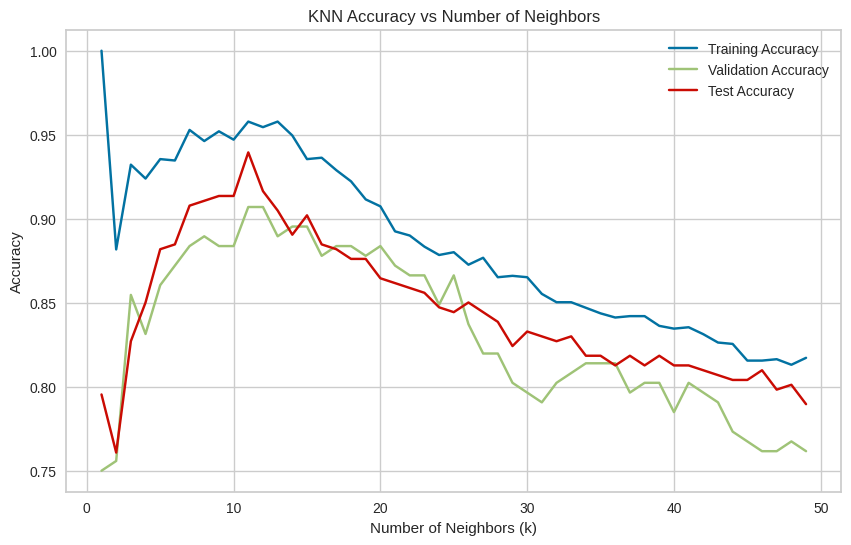

In [38]:
#Definir hiperparámetros (número de vecinos)
hyperparameters = range(1, 50)

#Listas para entrenamiento, validación y prueba
training_accuracy = []
validation_accuracy = []
test_accuracy = []

#Iterar diferentes valores k
for k in hyperparameters:
    #Clasificador KNN con  k actual
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_temp, y_train_temp)

    training_accuracy.append(accuracy_score(y_train_temp, knn.predict(X_train_temp)))
    validation_accuracy.append(accuracy_score(y_validation, knn.predict(X_validation)))
    test_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(hyperparameters, training_accuracy, label='Training Accuracy')
plt.plot(hyperparameters, validation_accuracy, label='Validation Accuracy')
plt.plot(hyperparameters, test_accuracy, label='Test Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Selección de K=10**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Entrenamiento Accuracy: 0.9578163771712159
Validación Accuracy: 0.9069767441860465
Prueba Accuracy: 0.9394812680115274


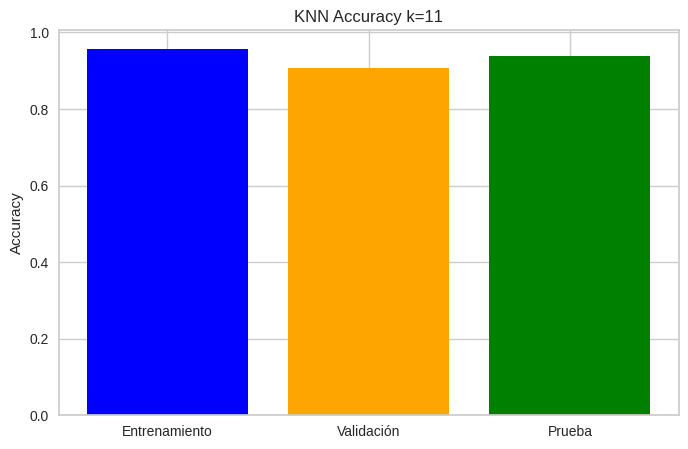

In [39]:
#Definir el valor de k
k_value = 11

knn = KNeighborsClassifier(n_neighbors=k_value)

knn.fit(X_train_temp, y_train_temp)

#Guardar modelo en .joblib
joblib.dump(best_classifier_rbf, 'modelo_svm_knn.joblib')
modelo_cargado_rbf = joblib.load('modelo_svm_knn.joblib')

y_train_pred = knn.predict(X_train_temp)
y_validation_pred = knn.predict(X_validation)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train_temp, y_train_pred)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Entrenamiento Accuracy: {train_accuracy}')
print(f'Validación Accuracy: {validation_accuracy}')
print(f'Prueba Accuracy: {test_accuracy}')

plt.figure(figsize=(8, 5))
plt.bar(['Entrenamiento', 'Validación', 'Prueba'], [train_accuracy, validation_accuracy, test_accuracy], color=['blue', 'orange', 'green'])
plt.title(f'KNN Accuracy k={k_value}')
plt.ylabel('Accuracy')
plt.show()

**Interpretación**

**Entrenamiento Accuracy**: 95.78% - indica que el modelo KNN clasifica correctamente el 95.78% de las instancias de entrenamiento.

**Validación Accuracy:** 90.70% - Exactitud de validación del 90.70% sugiere que el modelo KNN tiene un buen rendimiento en un conjunto de datos que no ha visto durante el entrenamiento.

**Prueba Accuracy:** 93.95% - El 93.95% de precisión en el conjunto de prueba indica que el modelo KNN generaliza bien a datos no vistos anteriormente.

In [40]:
#Entrenamiento
precision_train_knn = precision_score(y_train_temp, y_train_pred, average='weighted')
recall_train_knn = recall_score(y_train_temp, y_train_pred, average='weighted')
f1_train_knn = f1_score(y_train_temp, y_train_pred, average='weighted')

conf_matrix_train_knn = confusion_matrix(y_train_temp, y_train_pred)

print("Resultados de entrenamiento:")
print(f"Precision: {precision_train_knn}")
print(f"Recall: {recall_train_knn}")
print(f"F1-score: {f1_train_knn}")
print("Matriz de Confusión:")
print(conf_matrix_train_knn)

precision_test_knn = precision_score(y_test, y_test_pred, average='weighted')
recall_test_knn = recall_score(y_test, y_test_pred, average='weighted')
f1_test_knn = f1_score(y_test, y_test_pred, average='weighted')

conf_matrix_test_knn = confusion_matrix(y_test, y_test_pred)

print("\nResultados de prueba:")
print(f"Precision: {precision_test_knn}")
print(f"Recall: {recall_test_knn}")
print(f"F1-score: {f1_test_knn}")
print("Matriz de Confusión:")
print(conf_matrix_test_knn)

precision_validation_knn = precision_score(y_validation, y_validation_pred, average='weighted')
recall_validation_knn = recall_score(y_validation, y_validation_pred, average='weighted')
f1_validation_knn = f1_score(y_validation, y_validation_pred, average='weighted')

conf_matrix_validation_knn = confusion_matrix(y_validation, y_validation_pred)

print("\nResultados de validación:")
print(f"Precision: {precision_validation_knn}")
print(f"Recall: {recall_validation_knn}")
print(f"F1-score: {f1_validation_knn}")
print("Matriz de Confusión:")
print(conf_matrix_validation_knn)

Resultados de entrenamiento:
Precision: 0.9602633030052384
Recall: 0.9578163771712159
F1-score: 0.955143539483217
Matriz de Confusión:
[[252   0  14   0]
 [ 23  27   0   0]
 [  3   0 849   0]
 [ 10   0   1  30]]

Resultados de prueba:
Precision: 0.9362764298839751
Recall: 0.9394812680115274
F1-score: 0.9311159618544818
Matriz de Confusión:
[[ 77   1   4   0]
 [  8   3   0   1]
 [  0   0 237   0]
 [  6   0   1   9]]

Resultados de validación:
Precision: 0.8999038637612159
Recall: 0.9069767441860465
F1-score: 0.8998365194445466
Matriz de Confusión:
[[ 28   2   6   0]
 [  5   2   0   0]
 [  0   0 121   0]
 [  3   0   0   5]]


**Reporte de Clasificación**

In [41]:
print("\nReporte de Clasificación - Entrenamiento:")
print(classification_report(y_train_temp, y_train_pred))

print("\nReporte de Clasificación - Prueba:")
print(classification_report(y_test, y_test_pred))

print("\nReporte de Clasificación - Validación:")
print(classification_report(y_validation, y_validation_pred))


Reporte de Clasificación - Entrenamiento:
              precision    recall  f1-score   support

         acc       0.88      0.95      0.91       266
        good       1.00      0.54      0.70        50
       unacc       0.98      1.00      0.99       852
       vgood       1.00      0.73      0.85        41

    accuracy                           0.96      1209
   macro avg       0.96      0.80      0.86      1209
weighted avg       0.96      0.96      0.96      1209


Reporte de Clasificación - Prueba:
              precision    recall  f1-score   support

         acc       0.85      0.94      0.89        82
        good       0.75      0.25      0.38        12
       unacc       0.98      1.00      0.99       237
       vgood       0.90      0.56      0.69        16

    accuracy                           0.94       347
   macro avg       0.87      0.69      0.74       347
weighted avg       0.94      0.94      0.93       347


Reporte de Clasificación - Validación:
           

**Interpretación**

**Entrenamiento:**

El modelo clasifica correctamente el 96% de las instancias.
Para la clase "good", el modelo tiene un recall medio 50%, es decir que no identifica bien esta clase.

La clase "unacc" tiene una alta precisión y recall, indica un buen rendimiento para esta clase.

La clase "vgood" también presenta una buena precisión, pero su recall es más bajo, sugiere que podría haber instancias de esta clase que el modelo no está identificando tan bien.

**Prueba:**

La precisión en prueba es del 94%,indica que el modelo generaliza bien a datos no vistos.
Al igual que en el conjunto de entrenamiento, la clase "good" tiene un recall bajo, significa que el modelo tiene dificultades para identificar esta clase.
Las clases "unacc" y "vgood" tienen buenos resultados en términos de precisión y recall.


**Validación:**

La precisión en  validación es del 91%. Similar a los conjuntos de entrenamiento y prueba, la clase "good" muestra un recall bajo. Las clases "unacc" y "vgood" tienen buenos resultados, pero la clase "vgood" nuevamente muestra un recall más bajo.


El modelo tiene un buen rendimiento, pero en la identificación de la clase "good", en términos de recall presenta dificultades el modelo para reconocer.


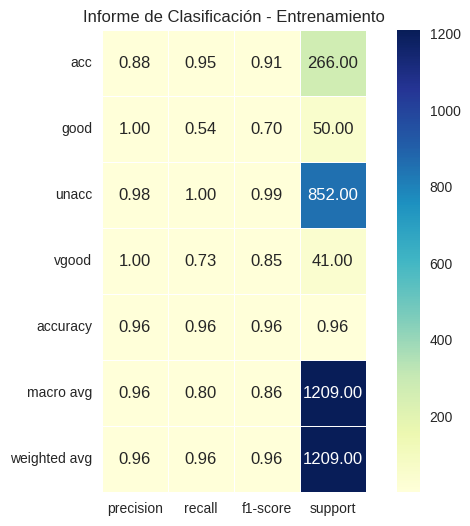

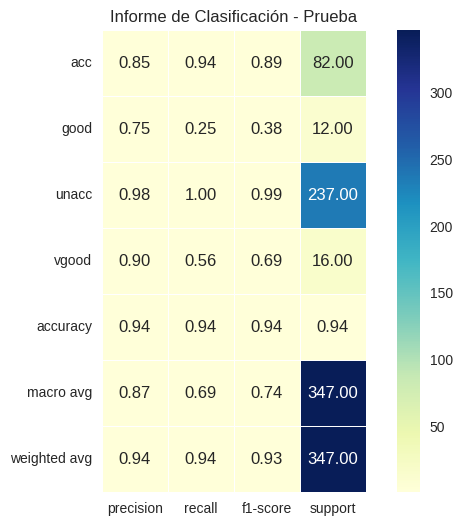

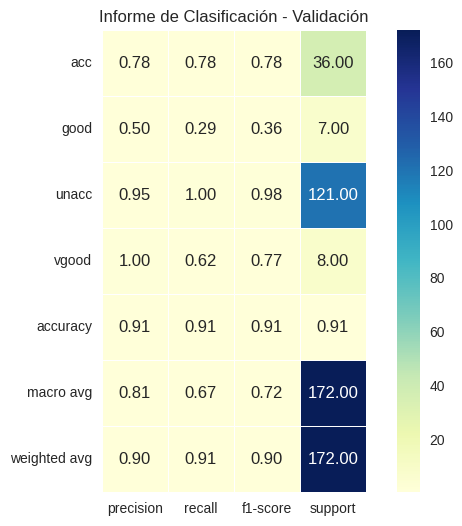

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train_temp, y_train_pred, output_dict=True)).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Entrenamiento")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Prueba")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict=True)).transpose(), annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5, square=True)
plt.title("Informe de Clasificación - Validación")
plt.show()

**ROC-AUC**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


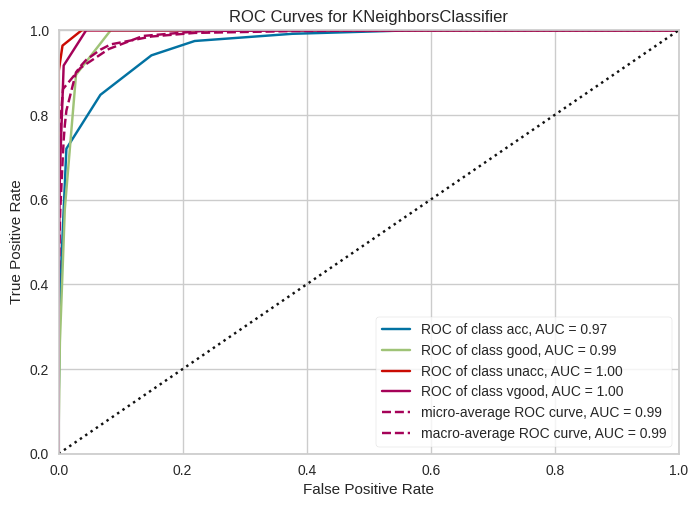

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
from sklearn.preprocessing import label_binarize

y_train_bin = label_binarize(y_train_temp, classes=np.unique(y_train_temp))
y_validation_bin = label_binarize(y_validation, classes=np.unique(y_validation))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

roc_auc_test = roc_auc_score(y_test_bin, knn.predict_proba(X_test), multi_class='ovr')

visualizer_test = ROCAUC(knn, classes=np.unique(y_test))
visualizer_test.fit(X_test, y_test)
visualizer_test.score(X_test_temp, y_test_temp)
visualizer_test.show()

**Interpretación**

**Clase "acc" Accuracy:**

AUC: 0.97

Interpretación: La curva ROC para la clase "acc" tiene un área bajo la curva (AUC) de 0.97. Esto indica un buen rendimiento del modelo en la capacidad de distinguir entre las instancias de la clase "acc" y las demás. Cuanto más cerca esté el AUC de 1, mejor es la capacidad de discriminación.

**Clase "good":**

AUC: 0.99

Interpretación: La curva ROC para la clase "good" tiene un AUC de 0.99. Esto sugiere una excelente capacidad del modelo para diferenciar entre las instancias de la clase "good" y las demás.


**Clase "unacc":**

AUC: 1

Interpretación: La curva ROC para la clase "unacc" tiene un AUC de 1, lo cual es ideal. Esto significa que el modelo es capaz de clasificar perfectamente las instancias de la clase "unacc" frente a las demás.


**Clase "vgood":**

AUC: 1

Interpretación: La curva ROC para la clase "vgood" preesenta un AUC de 1, indicando una capacidad excelente para distinguir entre las instancias de la clase "vgood" y las demás.


**Micro-average ROC Curve:**

AUC: 0.99

Interpretación: El AUC para la curva ROC micro-average es 0.99. considera todas las clases y todas las instancias, proporcionando una medida agregada del rendimiento del modelo.

**Macro-average ROC Curve:**

AUC: 0.99
Interpretación: El AUC para la curva ROC macro-average es 0.99.Promedia los AUC de cada clase, proporcionando una medida del rendimiento completo promedio del modelo en todas las clases.

# **JACCARD SCORE**

 El Índice de Jaccard mide la similitud entre dos conjuntos dividiendo la intersección de los conjuntos entre su unión. En el contexto de la clasificación, se puede usar para evaluar la similitud entre el conjunto de etiquetas predichas y el conjunto de etiquetas reales.

In [44]:
from sklearn.metrics import jaccard_score

jaccard_svm = jaccard_score(y_test, y_pred_test, average='weighted')
jaccard_knn = jaccard_score(y_test, y_test_pred, average='weighted')

print("\nÍndice de Jaccard para prueba en SVM:", jaccard_svm)
print("Índice de Jaccard para prueba en KNN:", jaccard_knn)


Índice de Jaccard para prueba en SVM: 0.9783548588798407
Índice de Jaccard para prueba en KNN: 0.8908183231209863


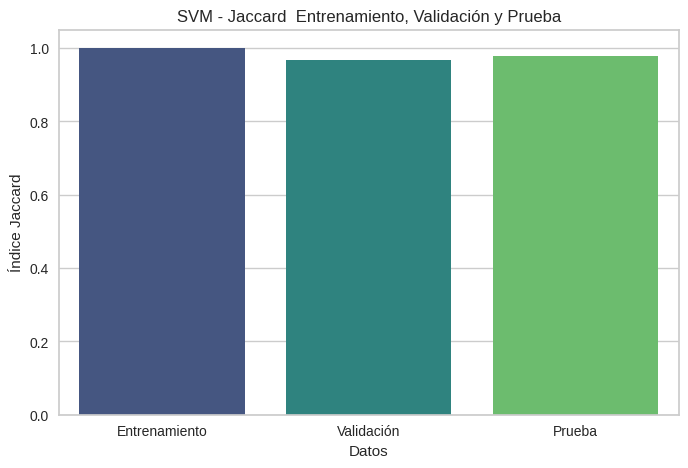

In [45]:
jaccard_train = jaccard_score(y_train_temp, y_pred_train, average='weighted')
jaccard_validation = jaccard_score(y_validation, y_pred_validation, average='weighted')
jaccard_test = jaccard_score(y_test, y_pred_test, average='weighted')

data = {'Datos': ['Entrenamiento', 'Validación', 'Prueba'],
        'Jaccard': [jaccard_train, jaccard_validation, jaccard_test]}

df_jaccard = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Datos', y='Jaccard', data=df_jaccard, palette='viridis')
plt.title('SVM - Jaccard  Entrenamiento, Validación y Prueba')
plt.ylabel('Índice Jaccard')
plt.show()


**Interpretación JACCARD en SVM**

El índice de Jaccard de prueba es del 97.83%, significa que, en promedio, el 97.83% de las predicciones realizadas por el modelo SVM coinciden con las etiquetas reales en el conjunto de prueba.

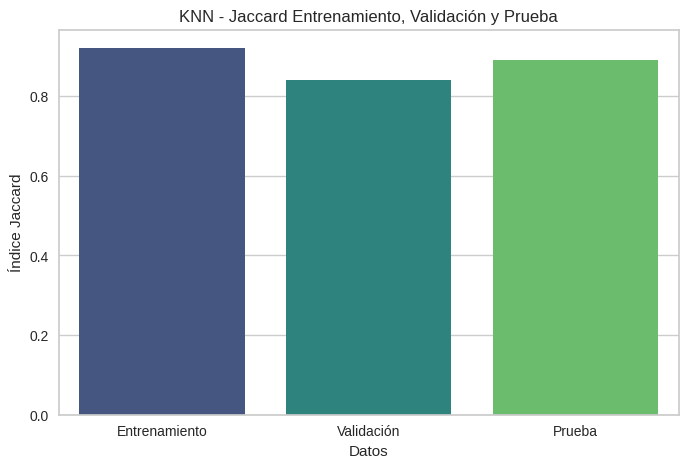

In [46]:
jaccard_train_knn = jaccard_score(y_train_temp, y_train_pred, average='weighted')
jaccard_validation_knn = jaccard_score(y_validation, y_validation_pred, average='weighted')
jaccard_test_knn = jaccard_score(y_test, y_test_pred, average='weighted')

data_knn = {'Datos': ['Entrenamiento', 'Validación', 'Prueba'],
            'Jaccard': [jaccard_train_knn, jaccard_validation_knn, jaccard_test_knn]}

df_jaccard_knn = pd.DataFrame(data_knn)

plt.figure(figsize=(8, 5))
sns.barplot(x='Datos', y='Jaccard', data=df_jaccard_knn, palette='viridis')
plt.title('KNN - Jaccard Entrenamiento, Validación y Prueba')
plt.ylabel('Índice Jaccard')
plt.show()

**Interpretación JACCARD en KNN**

El índice de Jaccard prueba KNN es del 89.08%, significa que, en promedio, el 89.08% de las predicciones realizadas por el modelo KNN coinciden con las etiquetas reales en el conjunto de prueba. Es un valor más bajo en comparación con SVM, sigue siendo una medida bastante buena de precisión.

# **Conclusión**

El modelo que mejores resultados presenta es el SVM con kernel 'poly' y C=10. Lo anterior se debe a que el dataset presenta una variable dependiente multiclase. El kernel polinómico presenta una mayor capacidad en este caso que uo lineal, debido a que el modelo es no lineal  y por su estructura presenta una mejor capacidad de diferenciación de clases a traves de características de las variables predictoras.